Code adapted from here https://gist.github.com/smakosh/cf3d9459c4f39f29def556471472aab4#file-flower_classifier-ipynb

How to create the boundary line https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create the dataset

In [2]:
X = [[0,0], [1,0], [2,0],
     [0,1], [1,1], [2,1], 
     [0,2], [1,2], [2,2],
     
     [3,0], [4,0], [5,0],
     [3,1], [4,1], [5,1],      
     [3,2], [4,2], [5,2]]

In [3]:
y = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1]

In [4]:
X = np.array(X)
y = np.array(y)

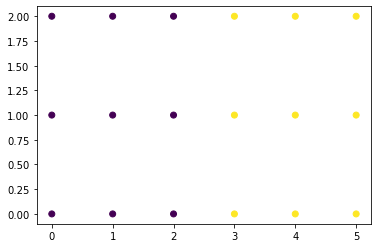

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Defining sigmoid activation function and its derivative

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

## How sigmoid and its derivative graph looks like

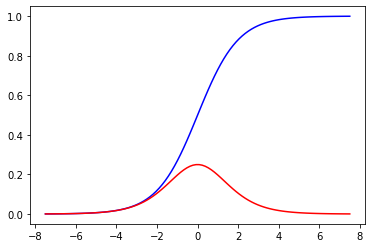

In [7]:
x_line           = np.linspace(-7.5, 7.5, 100)

y_line_sigmoid   = sigmoid(x_line)
y_line_d_sigmoid = d_sigmoid(x_line)

plt.plot(x_line, y_line_sigmoid, c='blue')
plt.plot(x_line, y_line_d_sigmoid, c='red')
plt.show()

## Defining squared error function and its derivative
Keep in mind that the sum() operation is not done here because we are going to sum up the errors right after the error of each data point being calculated.

In [8]:
def rss(actual, predicted):
    return np.square(actual-predicted)

def d_rss(actual, predicted):
    return 2*(predicted-actual)

## Initializing some values

In [9]:
epochs = 100
learning_rate = 0.2

## Initial weights and bias

In [10]:
np.random.seed(999)

weight_1 = np.random.random()
weight_2 = np.random.random()
bias     = np.random.random()

print('weight_1\t:', weight_1)
print('weight_2\t:', weight_2)
print('bias\t\t:', bias)

weight_1	: 0.8034280400796879
weight_2	: 0.5275222956826447
bias		: 0.11911146502821202


## Adjusting weights and bias (a.k.a. training)

In [11]:
losses = []
for _ in range(epochs):
    # Keeping track of the loss
    loss_sum = 0
    for i in range(len(X)):
        
        # Predicting (forward propagation)
        z = X[i,0] * weight_1 + X[i,1] * weight_2 + bias
        y_hat = sigmoid(z)
        
        # Calculate loss using squared error
        loss = rss(y[i], y_hat)
        loss_sum += loss
        
        # Derivative of loss function
        d_loss = d_rss(y[i], y_hat)
        
        # Derivative of activation function
        d_activation = d_sigmoid(z)
        
        # Derivative of linear eq 
        # (with the respect to w1, w2, and b)
        d_weight_1 = X[i,0]
        d_weight_2 = X[i,1]
        d_bias     = 1
  
        # Backpropagation
        d_weight_1 = d_loss * d_activation * d_weight_1
        d_weight_2 = d_loss * d_activation * d_weight_2
        d_bias     = d_loss * d_activation * d_bias
        
        # Gradient descent
        weight_1 = weight_1 - learning_rate * d_weight_1
        weight_2 = weight_2 - learning_rate * d_weight_2
        bias     = bias - learning_rate * d_bias
    
    losses.append(loss_sum)

In [12]:
print('weight_1\t:', weight_1)
print('weight_2\t:', weight_2)
print('bias\t\t:', bias)

weight_1	: 2.32851701070176
weight_2	: -0.20467838477389594
bias		: -5.198898251887948


In [13]:
print('Loss before training:', losses[0])
print('Loss after training :', losses[-1])

Loss before training: 4.650568558748082
Loss after training : 0.4366569402043907


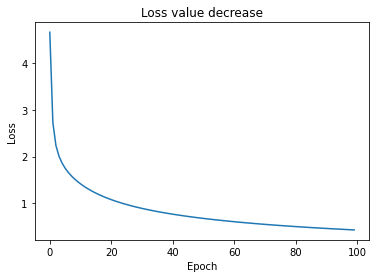

In [14]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss value decrease')
plt.show()

In [15]:
def predict(weight_1, weight_2, bias, X):
    
    predictions = []
    for i in range(len(X)):
        z = weight_1*X[i,0] + weight_2*X[i,1] + bias
        prediction = sigmoid(z)
        predictions.append(prediction)
        
    return predictions

In [16]:
preds = predict(weight_1, weight_2, bias, X)
preds

[0.0054923135332063154,
 0.053637296782535586,
 0.3677540214043764,
 0.0044802922714446865,
 0.04414782434636943,
 0.32157511387985827,
 0.0036540622826481254,
 0.03627287366073576,
 0.27863933531475094,
 0.8565164071152697,
 0.9839389977992535,
 0.998411993892206,
 0.8294839587970334,
 0.9803626926813719,
 0.9980520121374509,
 0.7985563766000359,
 0.9760094676885324,
 0.997610622169803]

In [17]:
preds = [round(pred) for pred in preds]
preds

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
# m: slope, c: constant
m = -(bias/weight_2) / (bias/weight_1)
c = -bias/weight_2

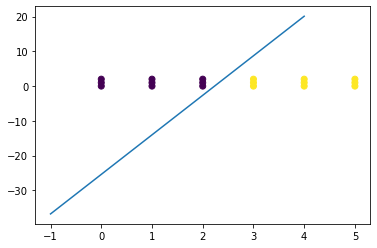

In [19]:
x_line = np.linspace(-1,4,100)
y_line = m*x_line + c

plt.plot(x_line, y_line)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()